In [18]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import normal
from scipy.stats import norm
from math import sqrt



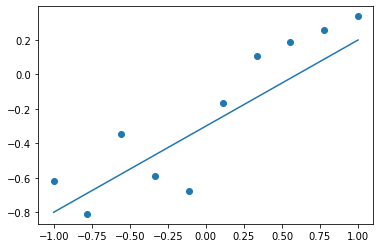

In [19]:
np.random.seed(69) #nice
x = np.linspace(-1, 1, 10)

def target(x, w0=-0.3, w1=0.5):
    return w0 + w1*x

y,t = [],[]
for i in x:
    i = target(i)
    t.append(i)
    y.append(i+normal(0,0.2))
plt.scatter(x,y)
plt.plot(x, t)

In [20]:
def gauss(x, y, w0, w1):
    sd = 0.2
    constant = sqrt(np.pi * 2) * sd
    return (1/constant) * np.exp(-0.5 * ((y - target(x, w0, w1))/sd) ** 2)

In [21]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
g0 = norm.pdf(w0, 0, sqrt(0.5))
g1 = norm.pdf(w1, 0, sqrt(0.5))
prior = g0 * g1

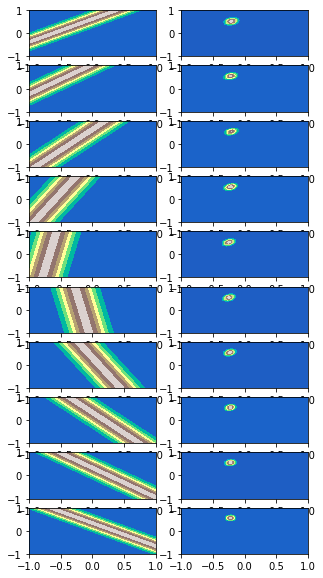

In [24]:
fig, axs = plt.subplots(10, 2, figsize=(5, 10))
count = 0
for i, j in zip(x, y):
    likelihood = gauss(i, j, w0, w1)
    posterior = prior * likelihood
    prior = posterior
    axs[count, 0].contourf(w0, w1, likelihood, cmap="terrain")
    axs[count, 1].contourf(w0, w1, posterior, cmap="terrain")
    count += 1
    fig.savefig("Likelihood and Posterior")